# Task1

## Lady Tasting Tea

An event in Fisher's life led him to design this experiment, His friend's future wife, Muriel Bristol, said that she could tell if the tea or the milk was put first into a cup. She was given eight cups, four of them created each way and given to her in random order. Fisher wanted to find the probability that she could say the order of addition to the cup. In the end, Muriel correctly identified which of the four cups of tea had milk poured before the tea.

Problem Statement
Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims that they have the special power of being able to tell if the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
1.	Calculate, using Python, the probability that they select the correct six cups.
Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.
2.	Calculate the probability, assuming they have no special powers, that the person makes at most one error.
3.	Would you accept two errors? Explain.



We have some assumptions to take into account for this test, we do this to try to ensure we taken out the element of chance and we are relying on statistical derivation. 
1. The lady is just guessing which way the milk was poured and cannot tell either way. This will follow the null hypothesis as her having np ability to tell the difference
2. Once a cup has been selected, it is not put back into the selection so it cannot be chosen twice or more times
3. It doesn't matter what way she does it, but she has to correctly state which way the milk was poured from her choice of 6 cups   from the 12.
4. We assume that she can tell the difference.

In [42]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

For this task, we will be using 12 cups of tea as the test. We can start by assigning the total number of cups to a variable and then split the total in two, to have variables with the number of cups having milk poured in before the tea and vice versa.

In [22]:
# total number of cups.
cups = 12

# Milk first.
milk_first = 6

# Tea first.
tea_first = 6

We can show that from 12 cups, there is a possibility of choosing 1 from 12 choices, that leaves 11 cups to choose from. 1 out of 11 leaves 10 and so on.
So, there are 12 x 11 x 10 x 9 x 8 x 7 choices of cup as the test progresses. After 6 cups have been selected the rest are ignored. 

In [23]:
# Total ways of selecting 6 random cups.
selection = math.comb(cups, milk_first)

# Display total number of possible selections.
selection

924

Now that we know how many permutations there are of selecting 6 cups from 12, we want to see the number ways we can randomise the presentation of the cups to the tester

In [24]:
# How many chances are there that the lady will select correctly out of the 6 cups.
correct = 6 * 5 * 4 * 3 * 2 * 1

# Display total number of possible selections.
correct

720

We can show how the random selection of 6 cups could be presented

In [25]:
#First we give the cups an identifier
identify = list(range(cups))

identify

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [26]:
#Using python, we can create a list of all the combinations that can be chosen from 12 cups. As shown previously, ther eshould be 924 combinations.
user_combinations = list(itertools.combinations(identify, milk_first))

user_combinations

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [27]:

#how many possible combinations are there
len(user_combinations)

924

In [28]:
milk_identify = random.sample(identify, 6)

#sort them in order
milk_identify.sort()

milk_identify

[0, 2, 3, 5, 6, 9]

In [29]:
#turn the list, user_combinations, into a set, comb, so that there are no repetitions  
num_of_overlaps = []

for comb in user_combinations:
    s1 = set(comb)
    s2 = set(milk_identify)
#show where the sets overlap
overlap = s1.intersection(s2)
#print(comb, overlap)
num_of_overlaps.append(len(overlap))

print(num_of_overlaps)

[2]


In [30]:
values = np.unique(num_of_overlaps, return_counts=True)

values

(array([2]), array([1], dtype=int64))

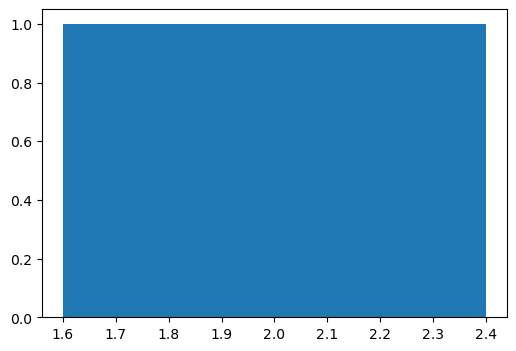

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(values[0], values[1]);

In [32]:
#The probability of selecting 6 cups correctly from 12 is given below
probability = 1 / selection

percentage = probability * 100

print(f'The probability for the first 6 cups to be identifiedcorrectly is {probability} which is {percentage}%')

The probability for the first 6 cups to be identifiedcorrectly is 0.0010822510822510823 which is 0.10822510822510822%


Therefore, we can see that the chance of selecting the six cups with milk poured first from 12 cups is 1 in 924.
Or 1/924 which gives us a probability of 0.001 (rounded down) or 0.1%.

Calculate the probability of making at least one error

In [33]:
# Probability of selecting exactly 5 correct cups

five_right = math.comb(6, 5) * math.comb(6, 1)


probability_5 = five_right / selection

percentage_5 = probability_5 * 100
probability_5
print(f'The probability for the subject to identify 5 cups correctly is {probability_5} or {percentage_5:.1f} %')


The probability for the subject to identify 5 cups correctly is 0.03896103896103896 or 3.9 %


To decide if we can accept two errors as reasonable, we have to calculate the probability of selecting 4 of the cups correctly out of 6:

In [34]:
four_right = math.comb(6, 4) * math.comb(6, 2)

probability_4 = four_right / selection

percentage_4 = probability_4 * 100

print(f'The probability for the subject to identify 4 cups correctly is {probability_4} or {percentage_4:.1f} %')

The probability for the subject to identify 4 cups correctly is 0.2435064935064935 or 24.4 %


In conclusion, the lady has a 24.4 % chance to select the cups with 2 errors allowed, 3.9 % to select with 1 error and 0.1 % to select all 6 cups correctly out of 12.

We carry out the statistical tests to see if the claim can be verified. 
If not, we call it the Null Hypothesis, whereby we can not find any statistics to prove the claim is correct. In our experiment, the Null hypothesis (H₀) would indicate to us that Muriel cannot reliably discern if milk is put in first to the cup or not. We try to ensure she selects the six cups from the twelve cups at random.
Alternative hypothesis (H₁): She can tell the difference between cups with the milk in first or not.

### Task 2: Numpy's Normal Distribution

Task 2 is to assess whether `numpy.random.normal()` properly generates normal values.
To start, we generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether the sample came from a normal distribution.
Explain the results and output.

Plot a histogram of the values and plot the corresponding normal distribution probability density function on top of it.

In [35]:
#
n = 100000
mu = 10.0
sigma = 3.0
n_bins = 30
# from lecture data = np.random.normal(size=100000)
#loc is mean of distrib, scale is the standard deviation so code is random.normal(loc=0.0, scale = 1.0, size = None)

sample = np.random.normal(loc=10.0, scale = 3.0, size = 100000)
#sample = np.random.default_rng(seed=100000)

In [36]:
shapiro_test = stats.shapiro(sample)

c:\Users\kevin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [37]:
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
print(f"p-value: {shapiro_test.pvalue}")


Shapiro-Wilk Test Statistic: 0.9999792575836182
p-value: 0.8993832468986511


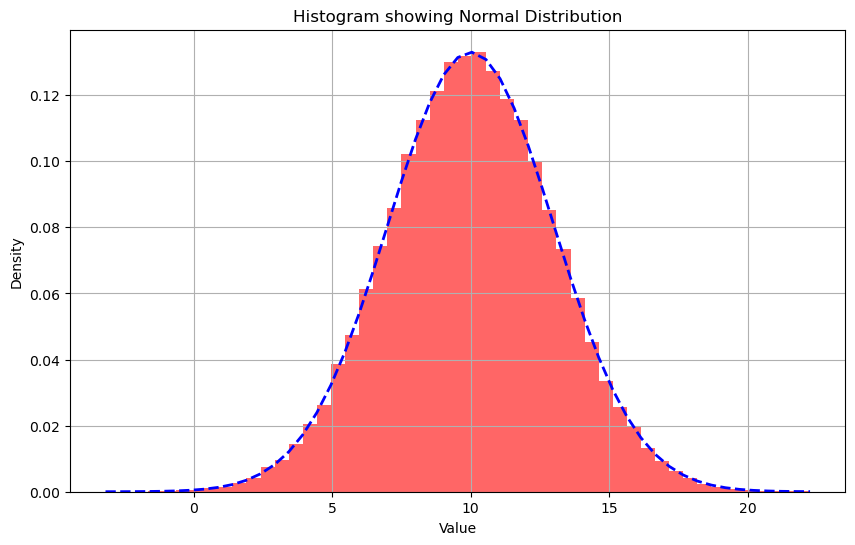

In [38]:
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(sample, bins=50, density=True, alpha=0.6, color='r')
pdf = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, pdf, 'b--', linewidth=2)
plt.title("Histogram showing Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid()
plt.show()

### Task 3: t-Test Calculation

In task 3, we consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.
Patient ID 0 1 2 3 4 5 6 7 8 9 Before 63 68 70 64 74 67 70 57 66 65 After 64 64 68 64 73 70 72 54 61 63
Calculate the t-statistic based on this data set, using Python. 
Compare it to the value given by scipy.stats. 

In [39]:

#Create the Data frames for the before and after resting heart rates
data = {'patient_id': [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'before':[ 63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
        'after': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]}

df = pd.DataFrame(data)    

df


,patient_id,before,after
0,0,63,64
1,1,68,64
2,2,70,68
3,3,64,64
4,4,74,73
5,5,67,70
6,6,70,72
7,7,57,54
8,8,66,61
9,9,65,63


In [ ]:
# Show the statistical details of the dataset
df.describe()


,patient_id,before,after
count,10.00000,10.00000,10.000000
mean,4.50000,66.40000,65.300000
std,3.02765,4.64758,5.677441
min,0.00000,57.00000,54.000000
25%,2.25000,64.25000,63.250000
50%,4.50000,66.50000,64.000000
75%,6.75000,69.50000,69.500000
max,9.00000,74.00000,73.000000


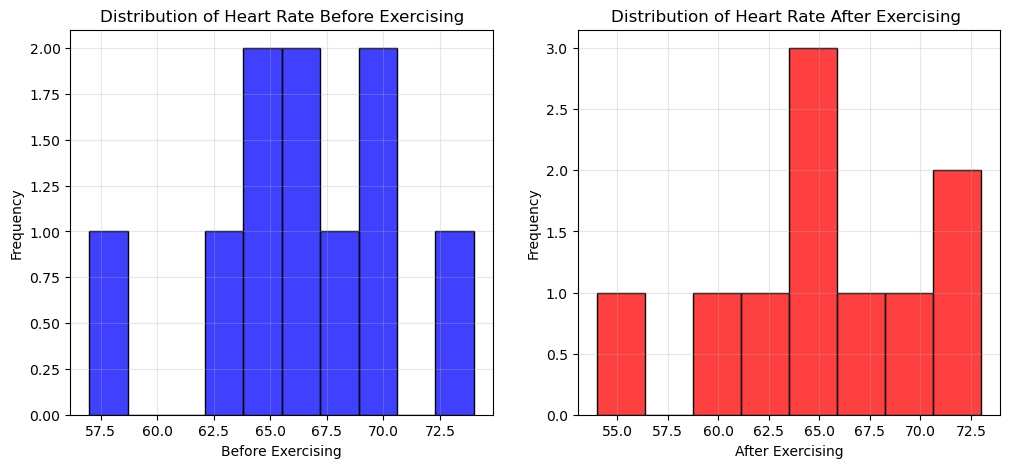

In [ ]:
# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Create the Histogram for before exercising.
sns.histplot(df['before'], bins=10, color='blue', ax=axs[0])
axs[0].set_title('Distribution of Heart Rate Before Exercising', fontsize=12)
axs[0].set_xlabel('Before Exercising', fontsize=10)
axs[0].set_ylabel('Frequency', fontsize=10)
axs[0].grid(alpha=0.3)
# Create the Histogram for after exercising.
sns.histplot(df['after'], bins=8, kde=False, color='red', ax=axs[1])
axs[1].set_title('Distribution of Heart Rate After Exercising ', fontsize=12)
axs[1].set_xlabel('After Exercising', fontsize=10)
axs[1].set_ylabel('Frequency', fontsize=10)
axs[1].grid(alpha=0.3)
# Show the plots.
plt.show()


In [58]:
# Split out the dataframe to the before and after data
Before = df['before']
After = df['after']